Author: Diego Ruiz \
Affiliation: Alice&Bob - INRIA \
Date: 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
ZL = np.load("./Logical error/ZL_bp_test.npy")[:,:,:,:12]
# compute logical error per logical qubit
ZL = 1 - (1 - ZL)**(1/10)

index 0 : product sum, min sum, min sum log, product sum log \
index 1 : nb rep bp 4,1032,5247,10000,11365 \
index 2 : scaling factor 0 = adpatative, 1 = 0.1, 2 = 0.625 or 3 = 1 \
index 3 : physical error

In [3]:
# physical error
err_phy = np.logspace(-3,np.log10(0.3),20)[:12]

# plot

In [4]:
# use latex
plt.rcParams['text.usetex'] = True

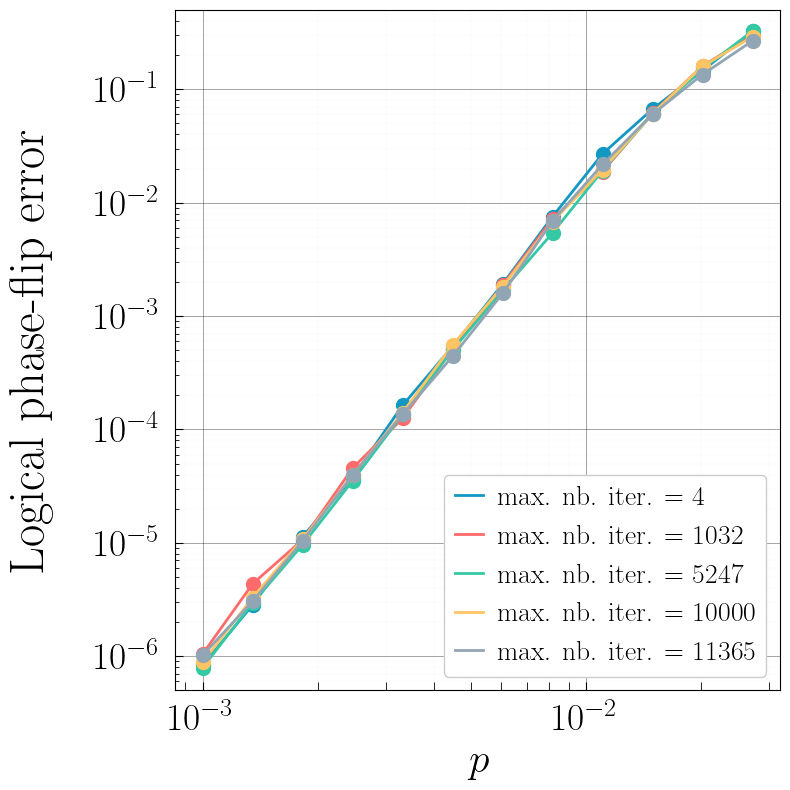

In [5]:
fig, ax = plt.subplots()

fig.set_size_inches(8,8)

# colors
rgcolor = ['#1398c4', '#ff6b6b', '#34C9A4', '#ffc463', '#92A5B5', '#BA55D3', '#c0675c', '#20817d']

ax.set_yscale('log')
ax.grid(which='major', linestyle='-', linewidth='0.5',alpha = 0.5, color='k')
ax.grid(which='minor', linestyle='-', linewidth='0.1',alpha = 0.1, color='k')
ax.minorticks_on()

# plot logical error
for i in range(5):
    plt.plot(err_phy, ZL[1][i][2], '-o', markersize=10,linewidth = 2,c=rgcolor[i])
    plt.plot([],[], '-', label= r"$\textrm{max. nb. iter. }$"+[r'$=4$',r'$=1032$',r'$=5247$',r'$=10000$',r'$=11365$'][i], markersize=10,linewidth = 2,c=rgcolor[i])
    plt.yscale('log')
    plt.xscale('log')

plt.legend(loc = 'lower right', prop={'size': 20},handlelength=1, handletextpad=0.5,framealpha=1.0)
    
# set axis
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=27, length=6,pad = 10)
ax.get_yaxis().set_tick_params(which='major', direction='in', labelsize=27, length=6,pad = 10)
ax.get_yaxis().set_tick_params(which='minor', direction='in', labelsize=27, length=3)
ax.set_xlabel(r'$p$', fontsize=30)
ax.set_ylabel(r'$\textrm{Logical phase-flip error}$', fontsize=35,rotation=90,labelpad=30)

plt.tight_layout()
plt.ylim(5e-7,0.5)

plt.savefig('Figure5.pdf')